# 21_HES-SO-ARC_646-2.3 SCIENCE DES DONNÉES 😁
## House Prices: Advanced Regression Techniques
##### Adrien Sigrist, Vincent Zurbrugg, Loic Mary, Antoine Frey

**Each phase of the process:**
1. [Business understanding](#Businessunderstanding)
    1. [Determine the Business Objectives](#BusinessObjectives)
    2. [Assess the Current Situation](#Assessthecurrentsituation)
        1. [Inventory of resources](#Inventory)
        2. [Requirements, assumptions and constraints](#Requirements)
        3. [Risks and contingencies](#Risks)
        4. [Terminology](#Terminology)
        5. [Costs and benefits](#CostBenefit)
    3. [What are the Desired Outputs](#Desiredoutputs)
    4. [What Questions Are We Trying to Answer?](#QA)
2. [Data Understanding](#Dataunderstanding)
    1. [Initial Data Report](#Datareport)
    2. [Describe Data](#Describedata)
    3. [Initial Data Exploration](#Exploredata) 
    4. [Verify Data Quality](#Verifydataquality)
        1. [Missing Data](#MissingData) 
        2. [Outliers](#Outliers) 
    5. [Data Quality Report](#Dataqualityreport)
3. [Data Preparation](#Datapreparation)
    1. [Select Your Data](#Selectyourdata)
    2. [Cleanse the Data](#Cleansethedata)
        1. [Label Encoding](#labelEncoding)
        2. [Drop Unnecessary Columns](#DropCols)
        3. [Altering Datatypes](#AlteringDatatypes)
        4. [Dealing With Zeros](#DealingZeros)
    3. [Construct Required Data](#Constructrequireddata)
    4. [Integrate Data](#Integratedata)
4. [Exploratory Data Analysis](#EDA)
5. [Modelling](#Modelling)
    1. [Modelling Technique](#ModellingTechnique)
    2. [Modelling Assumptions](#ModellingAssumptions)
    3. [Build Model](#BuildModel)
    4. [Assess Model](#AssessModel)
6. [Evaluation](#Evaluation)
    1. [Evaluate Results](#EvaluateResults)
    2. [Review Process](#ReviewProcess)
    3. [Determine Next Steps](#NextSteps)
7. [Deployment](#Deployment)
    1. [Plan Deployment](#PlanDeployment)
    2. [Plan Monitoring and Maintenance](#Monitoring)
    3. [Produce Final Report](#FinalReport)
    4. [Review Project](#ReviewProject)


# 1. Compréhension métier  <a class="anchor" id="Businessunderstanding"></a>

## 1.1 Les objectifs métiers <a class="anchor" id="BusinessObjectives"></a> 

Prédire le prix de maisons dont seul Kaggle dispose les informations de prix et cela avec la plus grande mesure de succes. 
Pour cela nous disposons d'un dataset "train" pour nous permettre d'entrainer notre algorithme et un dataset "test" pour le tester a la fin. 

La mesure du succès ne se fait pas sur les erreurs absolues mais les erreurs relatives. C'est un élement important car cela veut dire que la mesure de l'erreur entre le prix estimé et le prix réel se fait relativement au prix de la maison. En d'autre termes, les maisons cheres et les maisons bon marché affecteront le résultat de la meme maniere. 

(Exemple: 2 maisons: la premieres a 100'000 $ et l'autre a 1'000 000 $, mesurer l'erreur en valeur absolue voudrait dire qu'une difference de 10'000 $ pour les deux maisons affecterait le resultat de facon equivalente, cependant ce n'est pas le cas, la difference est mesurer en fonction du prix de la maison. La maison la plus chere affectera beaucoup moins le resultat car 10'000 $ représente une plus petite partie de son prix. 

En sachant cela nous utiliseront le log du prix qui nous permettra de visualiser le prix des maisons en valeur relative. 


## 1.2 Évaluer la situation actuelle<a class="anchor" id="Assessthecurrentsituation"></a>

Demandez à un acheteur de décrire la maison de ses rêves, et il ne commencera probablement pas par la hauteur du plafond du sous-sol ou la proximité d'une voie ferrée est-ouest. Mais les données de ce concours de terrain de jeu prouvent que l'influence sur les négociations de prix est bien plus importante que le nombre de chambres à coucher ou une clôture blanche.

Avec 79 variables explicatives décrivant (presque) tous les aspects des maisons résidentielles à Ames, dans l'Iowa, cette concurrence vous met au défi de prédire le prix final de chaque maison.

### 1.2.1 Inventaire des ressources <a class="anchor" id="Inventory"></a>

- Personnel: 4 personnes mentalement capables
- Données: 3 jeux de données et une description texte
- Computing resources: Nos pcs
- Software: Jupyter

### 1.2.2 Exigences, hypothèses et contraintes <a class="anchor" id="Requirements"></a> 
#### Exigences
- Rendre le projet le 1er Avril
- Savoir un minimum d'Anglais.

#### Hypothèses

#### Contraintes
- On ne peut pas se voir physiquement.

### 1.2.3 Risques et éventualités <a class="anchor" id="Risks"></a>
- Ne pas finir le projet à temps
- D'avoir des données inutilisables


### 1.2.4 Terminologie <a class="anchor" id="Terminology"></a>
- Pieds carré et non mettre carré


 ## 1.3 What are the desired outputs of the project? <a class="anchor" id="Desiredoutputs"></a>

### Critère de succès
- Avoir la marge d'erreur la plus petite possible
- 

### Critère de succès du minage de données
- Avoir une prédiction du prix qui se rapproche le plus possible de la réalité
- 

### Produire un plan de projet
- On va utiliser la méthodologie CRISP DM, pour analyser le jeu de données et produire un modèle statistique de prédiction.

<img src="image/gantt.jpg"
     alt="Gantt"
     style="height: 180px;" />



 ## 1.4 Quelles sont les questions auxquelles nous essayons de répondre ? <a class="anchor" id="QA"></a>

- 
- 

# 2. Compréhension des données <a class="anchor" id="Dataunderstanding"></a>

Dans cette phase, nous allons comprendre les données que nous avons dans notre dataSet. Pour relever celles qui pourront être utiles et celles qui ne le seront pas. Cette phase est importante car une bonne compréhension des datas permet une analyse plus précise et correcte. Dans ce processus on relève le taux de valeurs manquantes dans chaque attribut, mais également son type et éventuellement la décrire (quantitative, qualitative.. ).

## 2.1 Initial Data Report <a class="anchor" id="Datareport"></a>
Initial data collection report - 
List the data sources acquired together with their locations, the methods used to acquire them and any problems encountered. Record problems you encountered and any resolutions achieved. This will help both with future replication of this project and with the execution of similar future projects.

In [1]:
# Import Libraries Required
%matplotlib inline
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import scipy.stats as stats
import sklearn.linear_model as linear_model
import seaborn as sns
import statsmodels.api as sm
import graphviz
from sklearn.model_selection import KFold
from IPython.display import HTML, display
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn import ensemble


pd.options.display.max_rows = 1000
pd.options.display.max_columns = 20

In [2]:
# Data source: 
# ss =  pd.read_csv('data/sample_submission.csv', sep=',') 
test = pd.read_csv('data/test.csv', index_col = 'Id')
train = pd.read_csv('data/train.csv', index_col = 'Id')

## 2.2 Describe Data <a class="anchor" id="Describedata"></a>
Data description report - Describe the data that has been acquired including its format, its quantity (for example, the number of records and fields in each table), the identities of the fields and any other surface features which have been discovered. Evaluate whether the data acquired satisfies your requirements.

### Sample submission

In [3]:
#ss.columns

In [4]:
#ss.shape

In [5]:
#ss.dtypes

In [6]:
#ss.describe()

In [7]:
#ss.info()

In [8]:
#ss.head(5)

### Test

In [9]:
test.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [10]:
test.shape

(1459, 79)

In [11]:
test.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1       float64
BsmtFinType2      object
BsmtFinSF2       float64
BsmtUnfSF        float64
TotalBsmtSF      float64
Heating           object
HeatingQC         object


In [12]:
train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [13]:
test.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,52.619342,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,176.753926,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,0.000000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,0.000000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,1526.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


  MasVnrArea et BsmtFinSF1	GarageArea  LotFrontage (attention)

In [14]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 1461 to 2919
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1455 non-null   object 
 2   LotFrontage    1232 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   Alley          107 non-null    object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1457 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearB

In [15]:
test.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


### Train

In [16]:
train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [17]:
train.shape

(1460, 80)

In [18]:
train.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object
HeatingQC         object


In [19]:
train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [21]:
train.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## 2.3 Verify Data Quality <a class="anchor" id="Verifydataquality"></a>

Examine the quality of the data, addressing questions such as:

- Is the data complete (does it cover all the cases required)?
- Is it correct, or does it contain errors and, if there are errors, how common are they?
- Are there missing values in the data? If so, how are they represented, where do they occur, and how common are they?

#### La variable dépendante

Cette variable doit être analysée en tout premier lieu. En effet, c'est votre raison d'être dans la compétition. Bonjour SalePrice!

In [22]:
saleP = train['SalePrice']
train = train.drop(['SalePrice'], axis = 1)

saleP.head()

Id
1    208500
2    181500
3    223500
4    140000
5    250000
Name: SalePrice, dtype: int64

In [23]:
# descriptive statistics summary
saleP.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

C:\Users\97ant\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


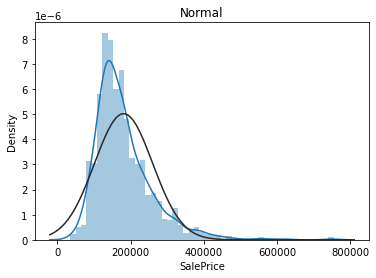

In [24]:
# distribution plot with normal fit
plt.title('Normal')
sns.distplot(saleP, fit = stats.norm)
plt.show()

La ligne bleue représente la distribution du prix et la ligne noire est la distribution normale. 
Ce qui nous amene a la conclusion que la variable du prix n'est pas normalement distribuée. 
Mais c'est normal! On n'utilise pas le log du prix comme expliqué plus haut.

C:\Users\97ant\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


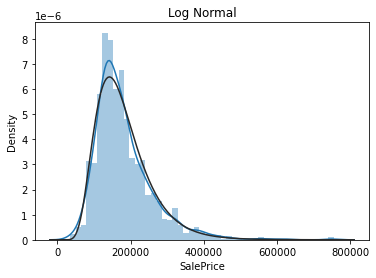

In [25]:
# distribution plot with log normal fit
plt.title('Log Normal')
sns.distplot(saleP, fit=stats.lognorm)
plt.show()

En utilisant le log normal, la distribution du prix est cette fois quasi normale.

C:\Users\97ant\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


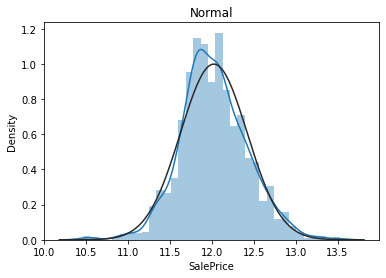

In [26]:
# distribution plot with normal fit
saleP = np.log1p(saleP)
plt.title('Normal')
sns.distplot(saleP, fit = stats.norm)
plt.show()

La même chôse peut être dites en utilisant log1p, qui est la version du log qui selon la documentation est à utiliser. 
https://numpy.org/doc/stable/reference/generated/numpy.log1p.html

#### Variable indépendantes

On traite maintenant les variables indépendantes du dataset. Ci-dessous, on regroupe les variables par type de variables. On note que certaines variables peuvent avoir plusieurs interprétations. Par exemple, la variable _OverallQual_ est une variable à priori qualitative ordinale. Cependant, puisqu'elle possède plus que 5 niveaux, on peut la traiter comme une variable quantitative. D'autres choix sont possibles.

In [27]:
qualitative = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
              'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
              'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
              'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
              'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
              'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
              'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish', 
              'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
              'SaleType', 'SaleCondition']

quantitative = ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1',  
               'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 
               'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 
               'PoolArea', 'MiscVal']

time = ['YearBuilt', 'YearRemodAdd', 'MoSold', 'YrSold', 'GarageYrBlt']

On concatene les deux dataset 

In [28]:
data_raw = pd.concat([train, test])

### 2.3.1 Missing Data <a class="anchor" id="MissingData"></a>
In addition to incorrect datatypes, another common problem when dealing with real-world data is missing values. These can arise for many reasons and have to be either filled in or removed before we train a machine learning model. First, let’s get a sense of how many missing values are in each column 

While we always want to be careful about removing information, if a column has a high percentage of missing values, then it probably will not be useful to our model. The threshold for removing columns should depend on the problem

#### Variable quantitative

In [29]:
def plot_missing(data):

    missing = data.isnull().sum()
    missing = missing[missing > 0]
    
    if missing.empty:
        print('Aucune donnée manquante')
    else :
        missing.sort_values(inplace=True)
        missing.plot.bar()
    
        plt.show()

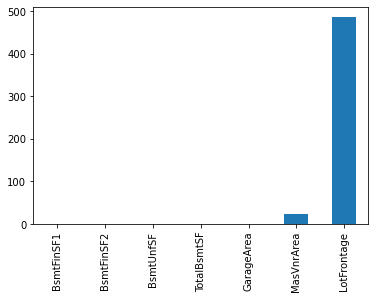

In [30]:
plot_missing(data_raw[quantitative])

In [31]:
def fill_missing_with_zero(data, columns):
    
    data_clean = data.copy()
    
    for c in columns :
        
        if data_clean[c].isnull().any():
            data_clean[c] = data_clean[c].fillna(0)
    
    return data_clean

#### Variable qualitative

Si on lit attentivement, les données manquantes ne sont en réalité pas manquantes. Elles sont selon la documentation des __NA__ ce qui veut dire que ça ne fait pas de sens de parler de ladite variables dans ce cas là...

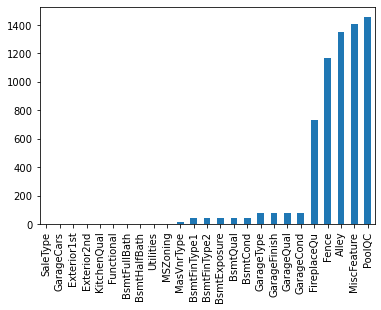

In [32]:
plot_missing(test[qualitative])

In [33]:
def get_dummies(data, columns):
    return pd.get_dummies(data, columns = columns)

Bien qu'il y ai des valeurs manquantes, elles ont une valeure métier. 
Par exemple avoir un null (NA) dans PoolQC (la qualité de la piscine)
signifie que la maison n'a pas de piscine.

Il est impossible de savoir quelle proportion des valeurs null a véritablement cette valeur métier ou les valeurs ne sont pas renseignées. 
Pour les colonnes en lien avec le garage (GarageQual, GarageYrBlt, GarageType, GarageFinish, GarageCond) elles ont toutes le même nombre de valeurs null ce qui indique que c'est une vraie valeur métier et pas simplement un oubli. La même chose peut être dites pour les variables lié au basement (sous-sol). 

Suite à cette observation, nous ne supprimerons aucune colonne ou valeur null. 

Variables temporelles

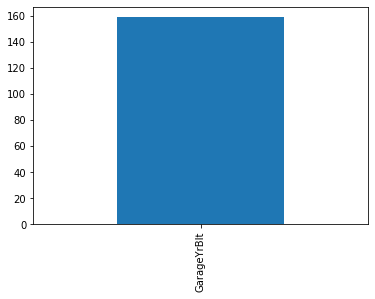

In [34]:
plot_missing(data_raw[time])

Les données "manquantes" ne le sont pas en réalité. Elles sont la conséquence qu'il n'y a pas de garage dans la maison... Afin d'être correct statistiquement parlant, on va substituer les null dans cette colonne avec la date de construction de la maison. Ces dates concordent très souvent. Il suffit de regarder le dataset. Ceci fait aussi sens d'un point de vue métier. Le garage est rarement construit à postériori. Il vient avec la maison.

In [35]:
def fill_missing_with_column(data, missing, column) :
    
    data_clean = data.copy()
    
    data_clean[missing].fillna(data_clean[column])
    
    return data_clean

De plus, on va traiter les variables temporelles en calculant l'age relatif à l'année de vente. D'un point de vu métier, c'est probablement plus pertinent, car les années de ventes se situe entre 2006 et 2010.

In [36]:
def compute_differences_to_year_sold(data) :
    
    data_clean = data.copy()
    
    data_clean['YearBuilt'] = data_clean['YrSold'] - data_clean['YearBuilt']
    data_clean['YearRemodAdd'] = data_clean['YrSold'] - data_clean['YearRemodAdd']
    data_clean['GarageYrBlt'] = data_clean['YrSold'] - data_clean['GarageYrBlt']
    
    return data_clean

#### Preprocessing

In [37]:
def preprocess(data, qualitative, quantitative):
    
    data_clean = data.copy()
    
    data_clean = get_dummies(data_clean, qualitative)
    data_clean = fill_missing_with_zero(data_clean, quantitative)
    data_clean = fill_missing_with_column(data_clean, missing = ['GarageYrBlt'], column = ['YearBuilt'])
    
    data_clean = compute_differences_to_year_sold(data_clean)
    
    return data_clean

In [38]:
data_clean = preprocess(data_raw, qualitative, quantitative)

data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 1 to 2919
Columns: 346 entries, LotFrontage to SaleCondition_Partial
dtypes: float64(8), int64(18), uint8(320)
memory usage: 1.5 MB


### 2.3.2 Outliers <a class="anchor" id="Outliers"></a>

Refaire en mieux

## 2.4 Initial Data Exploration  <a class="anchor" id="Exploredata"></a>
During this stage you'll address data mining questions using querying, data visualization and reporting techniques. These may include:

- **Distribution** of key attributes (for example, the target attribute of a prediction task)
- **Relationships** between pairs or small numbers of attributes
- Results of **simple aggregations**
- **Properties** of significant sub-populations
- **Simple** statistical analyses

These analyses may directly address your data mining goals. They may also contribute to or refine the data description and quality reports, and feed into the transformation and other data preparation steps needed for further analysis. 

- **Data exploration report** - Describe results of your data exploration, including first findings or initial hypothesis and their impact on the remainder of the project. If appropriate you could include graphs and plots here to indicate data characteristics that suggest further examination of interesting data subsets.

On va analyser le liens entre chacune des variables avec _SalePrice_. Pour ce faire, on a besoin de reséparer le dataset qui a été nettoyé en $X$ et $X_{val}$. La corrélation ne peut être calculée qu'entre $y$ et $X_{val}$.

In [39]:
X = data_clean[data_clean.index.isin(train.index)]
X_test = data_clean[data_clean.index.isin(test.index)]

In [40]:
X.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,65.0,8450,7,5,5,5,196.0,706.0,0.0,150.0,...,0,0,0,1,0,0,0,0,1,0
2,80.0,9600,6,8,31,31,0.0,978.0,0.0,284.0,...,0,0,0,1,0,0,0,0,1,0
3,68.0,11250,7,5,7,6,162.0,486.0,0.0,434.0,...,0,0,0,1,0,0,0,0,1,0
4,60.0,9550,7,5,91,36,0.0,216.0,0.0,540.0,...,0,0,0,1,1,0,0,0,0,0
5,84.0,14260,8,5,8,8,350.0,655.0,0.0,490.0,...,0,0,0,1,0,0,0,0,1,0


On va calculer les corrélations entre chacune des variables dépendantes avec la variable indépendante. Dans le cas des variables quantititatives, ceci suggère l'existence d'un lien linéaire. Dans le cas des variables dichotomiques la corrélation se fait interpréter comme une _corrélation bisérial de point_ (https://en.wikipedia.org/wiki/Point-biserial_correlation_coefficient). 

En bref, cette corrélation effectue un t-test à deux échantillons. La corrélation traduit la taille d'effet du t-test, qui correspond aussi à la part de variance expliquée par la variable dichotomique.

In [41]:
def correlation(y, X, method = 'pearson'):
    
    cor = pd.DataFrame()
    features = X.columns.tolist()
   
    cor['feature'] = X.columns.tolist()
    cor['correlation_coef'] = [X[f].corr(y, method = 'pearson') for f in features]
    cor['correlation_coef'] = cor['correlation_coef'].fillna(0)
    
    cor = cor.sort_values('correlation_coef')

    plt.figure(figsize=(10, 0.25*len(features)))
    sns.barplot(data = cor, y = 'feature', x = 'correlation_coef', orient = 'h')
    
    return cor

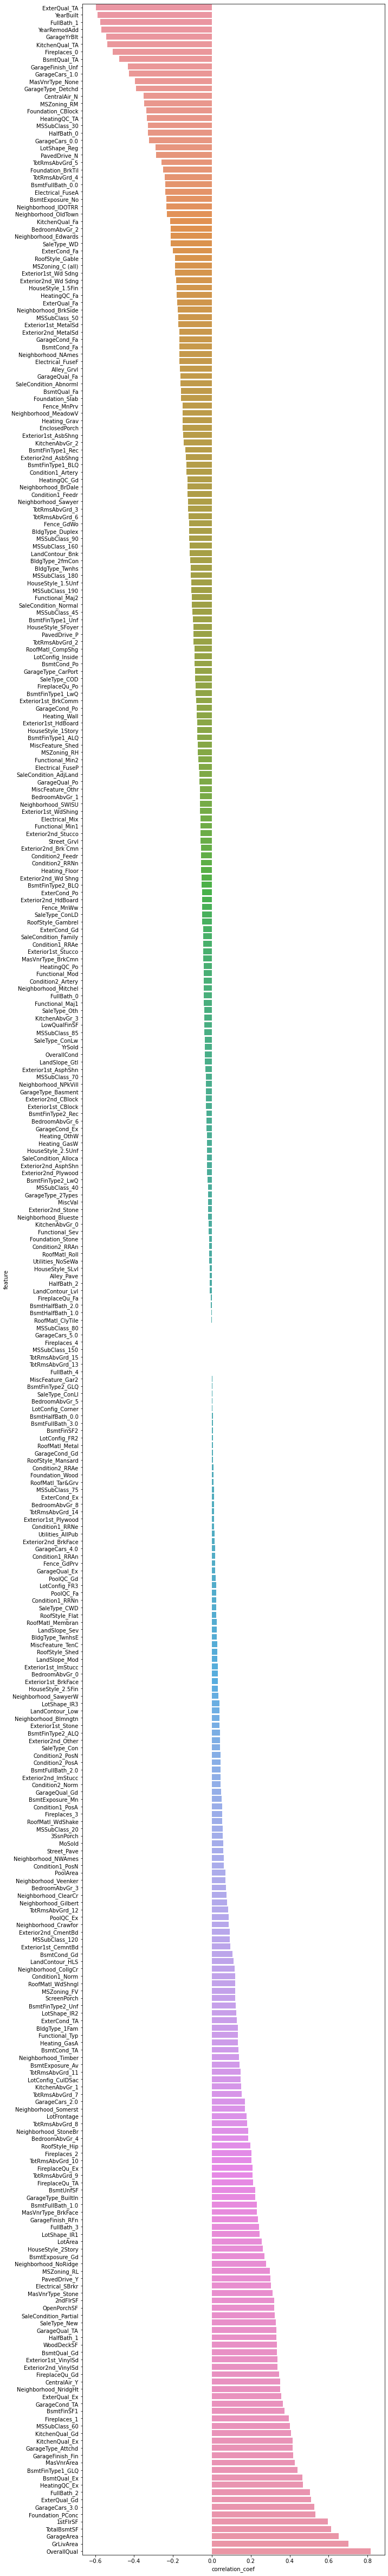

In [42]:
corr = correlation(saleP, X)

### 2.4.1 Distributions  <a class="anchor" id="Distributions"></a>

In [43]:
def count_values_table(df):
        count_val = df.value_counts()
        count_val_percent = 100 * df.value_counts() / len(df)
        count_val_table = pd.concat([count_val, count_val_percent.round(1)], axis=1)
        count_val_table_ren_columns = count_val_table.rename(
        columns = {0 : 'Count Values', 1 : '% of Total Values'})
        return count_val_table_ren_columns

In [44]:
# Histogram
def hist_chart(df, col):
        plt.style.use('fivethirtyeight')
        plt.hist(df[col].dropna(), edgecolor = 'k');
        plt.xlabel(col); plt.ylabel('Number of Entries'); 
        plt.title('Distribution of '+col);

### 2.4.2 Correlations  <a class="anchor" id="Correlations"></a>
En général, pour réduire le financement, seules les variables non corrélées entre elles doivent être ajoutées aux modèles de régression (qui sont corrélés avec le prix de vente).

In [45]:
def encode(frame, feature):
    ordering = pd.DataFrame()
    ordering['val'] = frame[feature].unique()
    ordering.index = ordering.val
    ordering['spmean'] = frame[[feature, 'SalePrice']].groupby(feature).mean()['SalePrice']
    ordering = ordering.sort_values('spmean')
    ordering['ordering'] = range(1, ordering.shape[0]+1)
    ordering = ordering['ordering'].to_dict()
    
    for cat, o in ordering.items():
        frame.loc[frame[feature] == cat, feature+'_E'] = o
    
#qual_encoded = []
#for q in qualitative:  
#    encode(train, q)
#    qual_encoded.append(q+'_E')

    #on utilise pas la fonction encode car on utilise un dummies

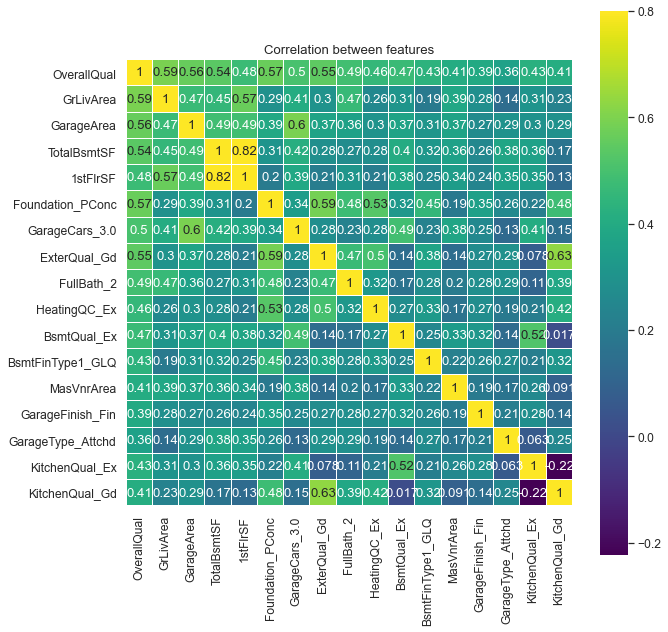

In [46]:
corrMatrix=X[["OverallQual","GrLivArea","GarageArea","TotalBsmtSF","1stFlrSF","Foundation_PConc","GarageCars_3.0", 
              "ExterQual_Gd","FullBath_2","HeatingQC_Ex","BsmtQual_Ex", "BsmtFinType1_GLQ","MasVnrArea",
              "GarageFinish_Fin","GarageType_Attchd","KitchenQual_Ex","KitchenQual_Gd"]].corr()
sns.set(font_scale=1.10)
plt.figure(figsize=(10, 10))
sns.heatmap(corrMatrix, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='viridis',linecolor="white")
plt.title('Correlation between features');

Ce tableau ci-dessus nous permet de voir les corrélations entre les différentes variables que nous avons sélectionnées (les variables qui ont le plus de corrélations avec "SalePrice"). Afin de repérer les variables fortement corrélées entre elles. 
Dans ce tableau on peut relever les variables "TotalBsmtSF"(Superficie total des fondations en mettres carées) et "1stFirSF"(mettres carrées du première étage). Ce qui d'un point de vu métier semble logique car les fondations son relativement de la même grandeur que le premier étage. Nous avons choisi de garder TotalBsmtSF car elle à le plus de corrélation avec le prix de vente. 

In [47]:
features=["OverallQual","GrLivArea","GarageArea","TotalBsmtSF","Foundation_PConc","GarageCars_3.0", 
              "ExterQual_Gd","FullBath_2","HeatingQC_Ex","BsmtQual_Ex", "BsmtFinType1_GLQ","MasVnrArea",
              "GarageFinish_Fin","GarageType_Attchd","KitchenQual_Ex","KitchenQual_Gd"]

#### Listes des 15 variables à garder dans un premier temps:

1. OverallQuall

2. GrLivArea

3. GarageArea

4. TotalBsmtSF

5. ~~1stFlrSF~~ (Trop forte corrélation avec TotalBsmtSF)

6. Foundation_PConc

7. GarageCars_3.0

8. ExterQual_Gd

9. FullBath_2 

10. HeatingQC_Ex

11. BsmtQual_Ex

12. MasVnrArea

13. GarageFinish_Fin

14. GarageType_Attchd

15. KitchenQual_Ex

16. KitchenQual_Gd

Ce graphe nous permet de montrer les variables qui on le plus d'influence sur la variable dépendante (**SalePrice**).

#### Vérifications des corrélations

Nous allons vérifier la corrélations des variables les plus impactantes avec un plot.

##### Boxplot de la qualité global de la maison (OverallQual) 

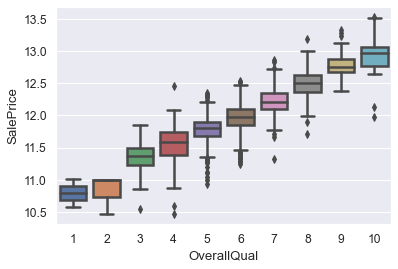

In [48]:
ax = sns.boxplot(x=X["OverallQual"], y=saleP, linewidth=2.5)

On peut voir que plus la qualité globale de la maison est élevé plus le prix median de la maison augemente 

Le graphe ressemble à cela car le prix est en log.

##### Scatter plot surface habitable (GrLivArea) 

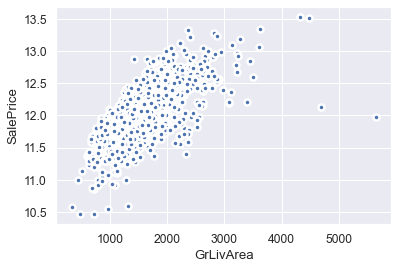

In [49]:
ax = sns.scatterplot(x=X["GrLivArea"], y=saleP, linewidth=2.5)

##### Scatter plot surface habitable (GrLivArea)

Nous allons supprimer quelques outliers pour mieux visualiser la correlation. 
 

In [50]:
'''Drop observations where GrLivArea is greater than 4000 sq.ft'''
train.drop(X[X.GrLivArea>4000].index, inplace = True)
train.reset_index(drop = True, inplace = True)

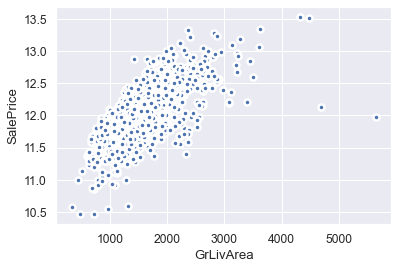

In [51]:
ax = sns.scatterplot(x=X["GrLivArea"], y=saleP, linewidth=2.5)

On peut voir qu''il y a une relation linéaire entre la surface habitable(au dessus du rez de chaussé) et le prix de ventes.

##### Plot de la capacité du garage (GarageCars)

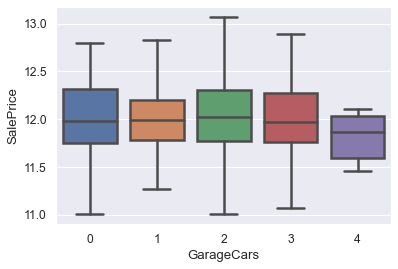

In [52]:
ax = sns.boxplot(x=train["GarageCars"], y=saleP, linewidth=2.5, showfliers=False)

On peut voir que plus on a de place dans le garage plus le prix median augemente à part à partir de 3 places.

#### Exterqual_Gd

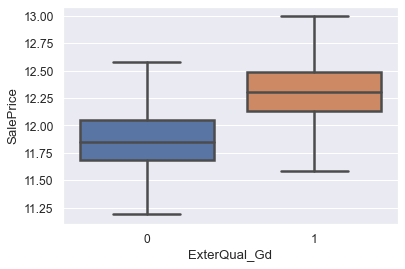

In [53]:
ax = sns.boxplot(x=X['ExterQual_Gd'], y=saleP, linewidth=2.5, showfliers=False)

On peut voir que plus la qualité de l exterieur est élevé plus le prix median est élevé. 

In [54]:
train['TotalBsmtSF'].shape

(1456,)

In [55]:
saleP.shape

(1460,)

In [56]:
'''Drop observations where TotalBsmtSF is greater than 3000 sq.ft '''
#train.drop(train[train.TotalBsmtSF>3000].index, inplace = True)
#train.drop(train[train.TotalBsmtSF<1].index, inplace = True)
#train.reset_index(drop = True, inplace = True)

'Drop observations where TotalBsmtSF is greater than 3000 sq.ft '

In [57]:
#plt.scatter(x=train['TotalBsmtSF'], y=saleP)
#plt.ylabel('Sale Price')
#plt.xlabel('Total basement square feet')
#plt.show()

On enlève les valeurs à zéro et les outliers au dessus de 3000 SF. 
On observe que la superficie des fondation à une relation linéaire avec le prix plus les fondations sont grandes et plus le prix augemente. 

## Ajouter le début de la régression linéaire 

1. Linear functional form: The response variable y should be a linearly related to the explanatory variables X.
2. Residual errors should be i.i.d.: After fitting the model on the training data set, the residual errors of the model should be independent and identically distributed random variables.
3. Residual errors should be normally distributed: The residual errors should be normally distributed.
4. Residual errors should be homoscedastic: The residual errors should have constant variance.

In [58]:
features=["OverallQual","GrLivArea","GarageArea","TotalBsmtSF","HeatingQC_Ex","BsmtQual_Ex", "BsmtFinType1_GLQ",
              "GarageFinish_Fin","GarageType_Attchd","KitchenQual_Ex","KitchenQual_Gd"]

In [59]:
x = X[features]
y = saleP


model = sm.OLS(y, sm.add_constant(x))  
model_fit = model.fit()
print(model_fit.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     594.7
Date:                Thu, 18 Mar 2021   Prob (F-statistic):               0.00
Time:                        16:26:54   Log-Likelihood:                 515.48
No. Observations:                1460   AIC:                            -1007.
Df Residuals:                    1448   BIC:                            -943.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                10.7618      0.02

In [60]:
from statsmodels.graphics.gofplots import ProbPlot
plt.style.use('seaborn') # pretty matplotlib plots
plt.rc('font', size=14)
plt.rc('figure', titlesize=18)
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=18)

def graph(formula, x_range, label=None):
    """
    Helper function for plotting cook's distance lines
    """
    x = x_range
    y = formula(x)
    plt.plot(x, y, label=label, lw=1, ls='--', color='red')


def diagnostic_plots(X, y, model_fit=None):
  """
  Function to reproduce the 4 base plots of an OLS model in R.

  ---
  Inputs:

  X: A numpy array or pandas dataframe of the features to use in building the linear regression model

  y: A numpy array or pandas series/dataframe of the target variable of the linear regression model

  model_fit [optional]: a statsmodel.api.OLS model after regressing y on X. If not provided, will be
                        generated from X, y
  """

  if not model_fit:
      model_fit = sm.OLS(y, sm.add_constant(X)).fit()

  # create dataframe from X, y for easier plot handling
  dataframe = pd.concat([X, y], axis=1)

  # model values
  model_fitted_y = model_fit.fittedvalues
  # model residuals
  model_residuals = model_fit.resid
  # normalized residuals
  model_norm_residuals = model_fit.get_influence().resid_studentized_internal
  # absolute squared normalized residuals
  model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
  # absolute residuals
  model_abs_resid = np.abs(model_residuals)
  # leverage, from statsmodels internals
  model_leverage = model_fit.get_influence().hat_matrix_diag
  # cook's distance, from statsmodels internals
  model_cooks = model_fit.get_influence().cooks_distance[0]

  plot_lm_1 = plt.figure()
  plot_lm_1.axes[0] = sns.residplot(model_fitted_y, dataframe.columns[-1], data=dataframe,
                            lowess=True,
                            scatter_kws={'alpha': 0.5},
                            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

  plot_lm_1.axes[0].set_title('Residuals vs Fitted')
  plot_lm_1.axes[0].set_xlabel('Fitted values')
  plot_lm_1.axes[0].set_ylabel('Residuals');

  # annotations
  abs_resid = model_abs_resid.sort_values(ascending=False)
  abs_resid_top_3 = abs_resid[:3]
  for i in abs_resid_top_3.index:
      plot_lm_1.axes[0].annotate(i,
                                 xy=(model_fitted_y[i],
                                     model_residuals[i]));

  QQ = ProbPlot(model_norm_residuals)
  plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)
  plot_lm_2.axes[0].set_title('Normal Q-Q')
  plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
  plot_lm_2.axes[0].set_ylabel('Standardized Residuals');
  # annotations
  abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)
  abs_norm_resid_top_3 = abs_norm_resid[:3]
  for r, i in enumerate(abs_norm_resid_top_3):
      plot_lm_2.axes[0].annotate(i,
                                 xy=(np.flip(QQ.theoretical_quantiles, 0)[r],
                                     model_norm_residuals[i]));

  plot_lm_3 = plt.figure()
  plt.scatter(model_fitted_y, model_norm_residuals_abs_sqrt, alpha=0.5);
  sns.regplot(model_fitted_y, model_norm_residuals_abs_sqrt,
              scatter=False,
              ci=False,
              lowess=True,
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
  plot_lm_3.axes[0].set_title('Scale-Location')
  plot_lm_3.axes[0].set_xlabel('Fitted values')
  plot_lm_3.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$');

  # annotations
  abs_sq_norm_resid = np.flip(np.argsort(model_norm_residuals_abs_sqrt), 0)
  abs_sq_norm_resid_top_3 = abs_sq_norm_resid[:3]
  for i in abs_norm_resid_top_3:
      plot_lm_3.axes[0].annotate(i,
                                 xy=(model_fitted_y[i],
                                     model_norm_residuals_abs_sqrt[i]));


  plot_lm_4 = plt.figure();
  plt.scatter(model_leverage, model_norm_residuals, alpha=0.5);
  sns.regplot(model_leverage, model_norm_residuals,
              scatter=False,
              ci=False,
              lowess=True,
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
  plot_lm_4.axes[0].set_xlim(0, max(model_leverage)+0.01)
  plot_lm_4.axes[0].set_ylim(-3, 5)
  plot_lm_4.axes[0].set_title('Residuals vs Leverage')
  plot_lm_4.axes[0].set_xlabel('Leverage')
  plot_lm_4.axes[0].set_ylabel('Standardized Residuals');

  # annotations
  leverage_top_3 = np.flip(np.argsort(model_cooks), 0)[:3]
  for i in leverage_top_3:
      plot_lm_4.axes[0].annotate(i,
                                 xy=(model_leverage[i],
                                     model_norm_residuals[i]));

  p = len(model_fit.params) # number of model parameters
  graph(lambda x: np.sqrt((0.5 * p * (1 - x)) / x),
        np.linspace(0.001, max(model_leverage), 50),
        'Cook\'s distance') # 0.5 line
  graph(lambda x: np.sqrt((1 * p * (1 - x)) / x),
        np.linspace(0.001, max(model_leverage), 50)) # 1 line
  plot_lm_4.legend(loc='upper right');

In [61]:
pd.set_option('display.max_columns', None)

C:\Users\97ant\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\97ant\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\97ant\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


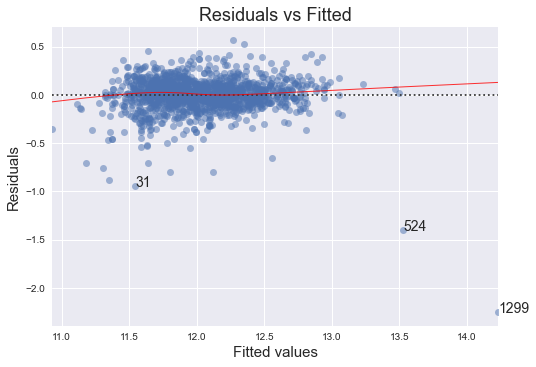

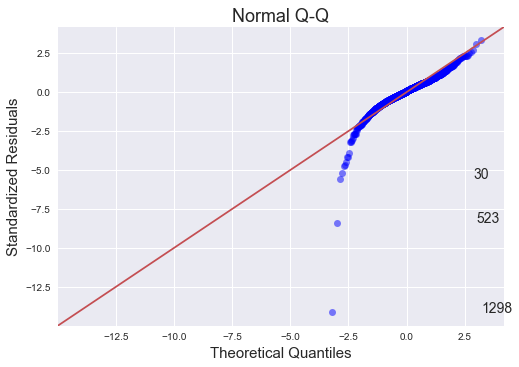

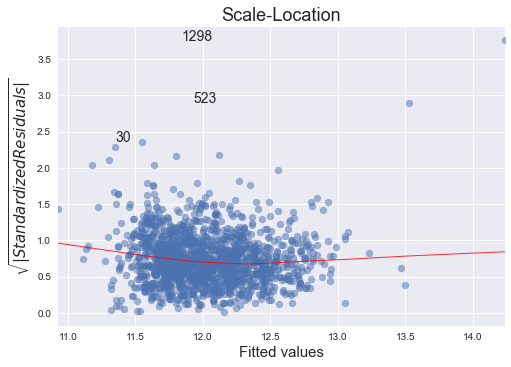

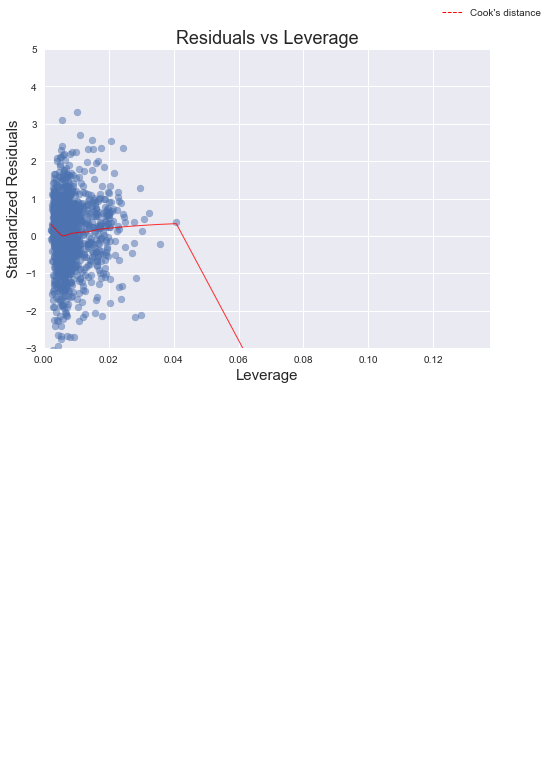

In [62]:
diagnostic_plots(x, y)

### La variable 31
Elle n'est pas trop extrême

In [63]:
np.expm1(saleP[31])

40000.0

In [64]:
x[26:31]

,OverallQual,GrLivArea,GarageArea,TotalBsmtSF,HeatingQC_Ex,BsmtQual_Ex,BsmtFinType1_GLQ,GarageFinish_Fin,GarageType_Attchd,KitchenQual_Ex,KitchenQual_Gd
Id,,,,,,,,,,,
27,5,900,576.0,900.0,0,0,0,0,0,0,1
28,8,1704,772.0,1704.0,1,1,1,0,1,0,1
29,5,1600,319.0,1484.0,0,0,0,0,1,0,0
30,4,520,240.0,520.0,0,0,0,0,0,0,0
31,4,1317,250.0,649.0,0,0,0,0,0,0,0


### La variable 524
Par rapport à son prix (~184'750.-) et en comparaisons des autres maisons le terrain est beaucoup trop grand (4676) donc nous supposons qu'il s'agit d'une ferme ou terrain agricole.

In [65]:
np.expm1(saleP[524])

184750.00000000006

In [66]:
x[519:524]

,OverallQual,GrLivArea,GarageArea,TotalBsmtSF,HeatingQC_Ex,BsmtQual_Ex,BsmtFinType1_GLQ,GarageFinish_Fin,GarageType_Attchd,KitchenQual_Ex,KitchenQual_Gd
Id,,,,,,,,,,,
520,7,2080,282.0,1276.0,1,0,0,0,0,0,1
521,4,1294,0.0,0.0,0,0,0,0,0,0,0
522,6,1244,336.0,1244.0,1,0,0,0,1,0,0
523,6,1664,420.0,1004.0,1,0,0,0,0,0,0
524,10,4676,884.0,3138.0,1,1,1,1,0,1,0


### La variable 1299
Par rapport à son prix (~160'000.-) et en comparaisons des autres maisons le terrain est beaucoup trop grand (5642) donc nous supposons qu'il s'agit d'une ferme ou terrain agricole.

In [67]:
np.expm1(saleP[1299])

159999.99999999997

In [68]:
x[1294:1305]

,OverallQual,GrLivArea,GarageArea,TotalBsmtSF,HeatingQC_Ex,BsmtQual_Ex,BsmtFinType1_GLQ,GarageFinish_Fin,GarageType_Attchd,KitchenQual_Ex,KitchenQual_Gd
Id,,,,,,,,,,,
1295,5,864,572.0,864.0,0,0,0,0,0,0,0
1296,5,1052,288.0,1052.0,0,0,0,0,1,0,0
1297,5,1128,525.0,1120.0,0,0,0,0,1,0,0
1298,6,1072,525.0,547.0,0,0,1,1,0,0,0
1299,10,5642,1418.0,6110.0,1,1,1,1,1,1,0
1300,5,1246,305.0,1246.0,1,0,0,0,1,0,1
1301,7,1983,490.0,978.0,1,0,1,1,1,0,1
1302,6,1494,213.0,771.0,0,0,0,0,1,0,1
1303,8,2526,844.0,1165.0,1,0,1,0,1,0,1


In [69]:
x.head()

,OverallQual,GrLivArea,GarageArea,TotalBsmtSF,HeatingQC_Ex,BsmtQual_Ex,BsmtFinType1_GLQ,GarageFinish_Fin,GarageType_Attchd,KitchenQual_Ex,KitchenQual_Gd
Id,,,,,,,,,,,
1,7,1710,548.0,856.0,1,0,1,0,1,0,1
2,6,1262,460.0,1262.0,1,0,0,0,1,0,0
3,7,1786,608.0,920.0,1,0,1,0,1,0,1
4,7,1717,642.0,756.0,0,0,0,0,0,0,1
5,8,2198,836.0,1145.0,1,0,1,0,1,0,1


In [70]:
x.head()

,OverallQual,GrLivArea,GarageArea,TotalBsmtSF,HeatingQC_Ex,BsmtQual_Ex,BsmtFinType1_GLQ,GarageFinish_Fin,GarageType_Attchd,KitchenQual_Ex,KitchenQual_Gd
Id,,,,,,,,,,,
1,7,1710,548.0,856.0,1,0,1,0,1,0,1
2,6,1262,460.0,1262.0,1,0,0,0,1,0,0
3,7,1786,608.0,920.0,1,0,1,0,1,0,1
4,7,1717,642.0,756.0,0,0,0,0,0,0,1
5,8,2198,836.0,1145.0,1,0,1,0,1,0,1


In [71]:
#31,411,496,524,611,633,917,969,1299
x=x.drop([31,524,1299])
y=y.drop([31,524,1299])

C:\Users\97ant\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\97ant\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\97ant\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


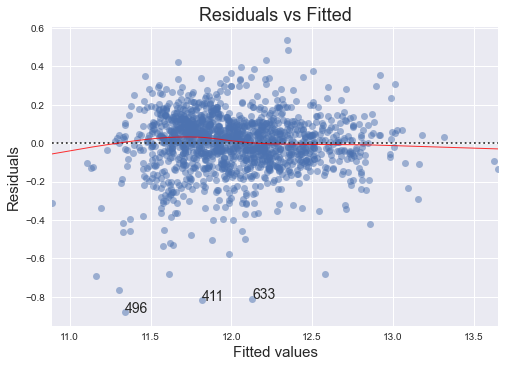

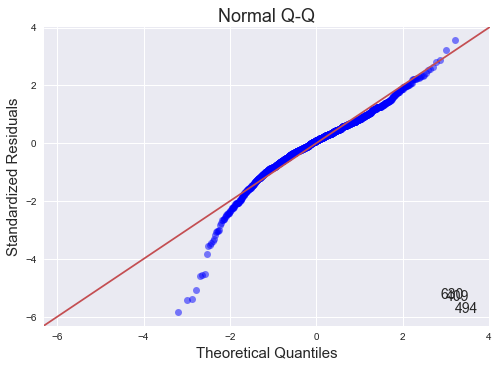

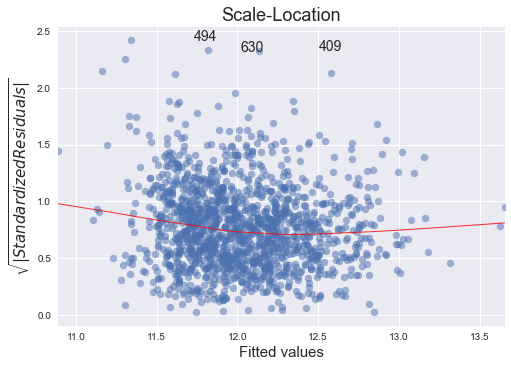

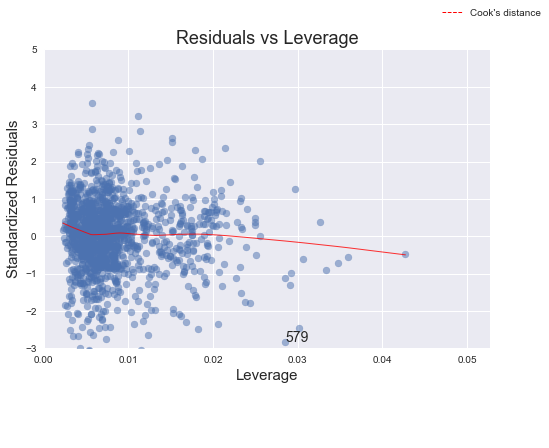

In [72]:
diagnostic_plots(x, y)

#### Scatter plot de la surface du terrain

In [73]:
#df_agg = df.drop(['x'], axis=1).groupby(['y']).sum()
#df_agg = train.groupby(['y']).sum()

### 2.4.3 Differencing
Specifically, a new series is constructed where the value at the current time step is calculated as the difference between the original observation and the observation at the previous time step.
value(t) = observation(t) - observation(t-1)

In [74]:
#df_dif_agg = df_agg

In [75]:
#Differencing
#Specifically, a new series is constructed where the value at the current time step is calculated 
#as the difference between the original observation and the observation at the previous time step.
#value(t) = observation(t) - observation(t-1)
df_dif = df_dif_agg.diff()

NameError: name 'df_dif_agg' is not defined

## 2.5 Data Quality Report <a class="anchor" id="Dataqualityreport"></a>
List the results of the data quality verification. If quality problems exist, suggest possible solutions. Solutions to data quality problems generally depend heavily on both data and business knowledge.

## 2.6 Test

In [ ]:
x = train[['GarageCars', 'OverallQual', 'GrLivArea']]
y = train[['SalePrice']]

model = sm.OLS(y, sm.add_constant(x))  
model_fit = model.fit()
print(model_fit.summary())

# 3. Data Preparation <a class="anchor" id="Datapreparation"></a>
This is the stage of the project where you decide on the data that you're going to use for analysis. The criteria you might use to make this decision include the relevance of the data to your data mining goals, the quality of the data, and also technical constraints such as limits on data volume or data types. Note that data selection covers selection of attributes (columns) as well as selection of records (rows) in a table.

## 3.1 Select Your Data <a class="anchor" id="Selectyourdata"></a>
This is the stage of the project where you decide on the data that you're going to use for analysis. The criteria you might use to make this decision include the relevance of the data to your data mining goals, the quality of the data, and also technical constraints such as limits on data volume or data types. Note that data selection covers selection of attributes (columns) as well as selection of records (rows) in a table.

Rationale for inclusion/exclusion - List the data to be included/excluded and the reasons for these decisions.

In [ ]:
X_train_regr = df.drop(['date_maint', 'account_open_date'], axis = 1)
X_train = df.drop(['target', 'date_maint', 'account_open_date'], axis = 1)
X_test = test.drop(['date_maint', 'account_open_date'], axis = 1)

## 3.2 Clean The Data <a class="anchor" id="Cleansethedata"></a>
This task involves raise the data quality to the level required by the analysis techniques that you've selected. This may involve selecting clean subsets of the data, the insertion of suitable defaults, or more ambitious techniques such as the estimation of missing data by modelling.

### 3.2.1 Label Encoding <a class="anchor" id="labelEncoding"></a>
Label Encoding to turn Categorical values to Integers

An approach to encoding categorical values is to use a technique called label encoding. Label encoding is simply converting each value in a column to a number. For example, the body_style column contains 5 different values. We could choose to encode it like this:

convertible -> 0
hardtop -> 1
hatchback -> 2
sedan -> 3
wagon -> 4
http://pbpython.com/categorical-encoding.html

In [ ]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
for col in CAT_COLS:
        encoder = LabelEncoder()
        X_train[col] = encoder.fit_transform(X_train[col].astype(str))
        X_test[col] = encoder.transform(X_test[col].astype(str))

In [ ]:
df["column"] = df["column"].astype('category')
df.dtypes

In [ ]:
df["column"] = df["column"].cat.codes
df.head()

### 3.2.2 Drop Unnecessary Columns <a class="anchor" id="DropCols"></a>
Sometimes we may not need certain columns. We can drop to keep only relevent data

In [ ]:
train = train.drop(list(missing_columns), 1)

### 3.2.3 Altering Data Types <a class="anchor" id="AlteringDatatypes"></a>
Sometimes we may need to alter data types. Including to/from object datatypes

In [ ]:
#df['date'] = pd.to_datetime(df['date'])

### 3.2.4 Dealing With Zeros <a class="anchor" id="DealingZeros"></a>
Replacing all the zeros from cols. **Note** You may not want to do this - add / remove as required

In [ ]:
#cols = ['col1', 'col2']
#df[cols] = df[cols].replace(0, np.nan)

In [ ]:
# dropping all the rows with na in the columns mentioned above in the list.

# df.dropna(subset=cols, inplace=True)


### 3.2.5 Dealing With Duplicates <a class="anchor" id="DealingDuplicates"></a>
Remove duplicate rows. **Note** You may not want to do this - add / remove as required

In [ ]:
#df = df.drop_duplicates(keep='first')

## 3.3 Construct Required Data   <a class="anchor" id="Constructrequireddata"></a>
This task includes constructive data preparation operations such as the production of derived attributes or entire new records, or transformed values for existing attributes.

**Derived attributes** - These are new attributes that are constructed from one or more existing attributes in the same record, for example you might use the variables of length and width to calculate a new variable of area.

**Generated records** - Here you describe the creation of any completely new records. For example you might need to create records for customers who made no purchase during the past year. There was no reason to have such records in the raw data, but for modelling purposes it might make sense to explicitly represent the fact that particular customers made zero purchases.


## 3.4 Integrate Data  <a class="anchor" id="Integratedata"></a>
These are methods whereby information is combined from multiple databases, tables or records to create new records or values.

**Merged data** - Merging tables refers to joining together two or more tables that have different information about the same objects. For example a retail chain might have one table with information about each store’s general characteristics (e.g., floor space, type of mall), another table with summarised sales data (e.g., profit, percent change in sales from previous year), and another with information about the demographics of the surrounding area. Each of these tables contains one record for each store. These tables can be merged together into a new table with one record for each store, combining fields from the source tables.

**Aggregations** - Aggregations refers to operations in which new values are computed by summarising information from multiple records and/or tables. For example, converting a table of customer purchases where there is one record for each purchase into a new table where there is one record for each customer, with fields such as number of purchases, average purchase amount, percent of orders charged to credit card, percent of items under promotion etc.


### Construct Our Primary Data Set
Join data 

# 4. Exploratory Data Analysis <a class="anchor" id="EDA"></a>

Now that the dataset has been prepared, you'll need to analyze it and summarize it's main characteristics, often with visual methods. A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task. 

# 5. Modelling <a class="anchor" id="Modelling"></a>
As the first step in modelling, you'll select the actual modelling technique that you'll be using. Although you may have already selected a tool during the business understanding phase, at this stage you'll be selecting the specific modelling technique e.g. decision-tree building with C5.0, or neural network generation with back propagation. If multiple techniques are applied, perform this task separately for each technique.

## 5.1. Modelling technique <a class="anchor" id="ModellingTechnique"></a>
Document the actual modelling technique that is to be used.

Import Models below:

## 5.2 Modelling assumptions <a class="anchor" id="ModellingAssumptions"></a>
Many modelling techniques make specific assumptions about the data, for example that all attributes have uniform distributions, no missing values allowed, class attribute must be symbolic etc. Record any assumptions made.

- 
- 


## 5.3 Build Model <a class="anchor" id="BuildModel"></a>
Run the modelling tool on the prepared dataset to create one or more models.

**Parameter settings** - With any modelling tool there are often a large number of parameters that can be adjusted. List the parameters and their chosen values, along with the rationale for the choice of parameter settings.

**Models** - These are the actual models produced by the modelling tool, not a report on the models.

**Model descriptions** - Describe the resulting models, report on the interpretation of the models and document any difficulties encountered with their meanings.

## 5.4 Assess Model <a class="anchor" id="AssessModel"></a>
Interpret the models according to your domain knowledge, your data mining success criteria and your desired test design. Judge the success of the application of modelling and discovery techniques technically, then contact business analysts and domain experts later in order to discuss the data mining results in the business context. This task only considers models, whereas the evaluation phase also takes into account all other results that were produced in the course of the project.

At this stage you should rank the models and assess them according to the evaluation criteria. You should take the business objectives and business success criteria into account as far as you can here. In most data mining projects a single technique is applied more than once and data mining results are generated with several different techniques. 

**Model assessment** - Summarise the results of this task, list the qualities of your generated models (e.g.in terms of accuracy) and rank their quality in relation to each other.

**Revised parameter settings** - According to the model assessment, revise parameter settings and tune them for the next modelling run. Iterate model building and assessment until you strongly believe that you have found the best model(s). Document all such revisions and assessments.

# 6. Evaluation <a class="anchor" id="Evaluation"></a>

Before proceeding to final deployment of the model built by the data analyst, it is important to more thoroughly evaluate the model and review the model’s construction to be certain it properly achieves the business objectives. Here it is critical to determine if some important business issue has not been sufficiently considered. At the end of this phase, the project leader then should decide exactly how to use the data mining results. The key steps here are the evaluation of results, the process review, and the determination of next steps.

## 6.1 Evaluate Results <a class="anchor" id="EvaluateResults"></a>

Previous evaluation steps dealt with factors such as the accuracy and generality of the model. This step assesses the degree to which the model meets the business objectives and determines if there is some business reason why this model is deficient. Another option here is to test the model(s) on real-world applications—if time and budget constraints permit. Moreover, evaluation also seeks to unveil additional challenges, information, or hints for future directions.

At this stage, the data analyst summarizes the assessment results in terms of business success criteria, including a final statement about whether the project already meets the initial
business objectives.

## 6.2 Review Process <a class="anchor" id="ReviewProcess"></a>

It is now appropriate to do a more thorough review of the data mining engagement to determine if there is any important factor or task that has somehow been overlooked. This review also covers quality assurance issues (e.g., did we correctly build the model? Did we only use allowable attributes that are available for future deployment?).

## 6.3 Determine Next Steps <a class="anchor" id="NextSteps"></a>

At this stage, the project leader must decide whether to finish this project and move on to deployment or whether to initiate further iterations or set up new data mining projects.

# 7. Deployment  <a class="anchor" id="Deployment"></a>

Model creation is generally not the end of the project. The knowledge gained must be organized and presented in a way that the customer can use it, which often involves applying “live” models within an organization’s decision-making processes, such as the real-time personalization of Web pages or repeated scoring of marketing databases.

Depending on the requirements, the deployment phase can be as simple as generating a report or as complex as implementing a repeatable data mining process across the enterprise. Even though it is often the customer, not the data analyst, who carries out the deployment steps, it is important for the customer to understand up front what actions must be taken in order to actually make use of the created models. The key steps here are plan deployment, plan monitoring and maintenance, the production of the final report, and review of the project.

## 7.1 Plan Deployment <a class="anchor" id="PlanDeployment"></a>

In order to deploy the data mining result(s) into the business, this task takes the evaluation results and develops a strategy for deployment.

## 7.2 Plan Monitoring and Maintenance <a class="anchor" id="Monitoring"></a>
Monitoring and maintenance are important issues if the data mining result is to become part of the day-to-day business and its environment. A carefully prepared maintenance strategy avoids incorrect usage of data mining results.

## 7.3 Produce Final Report <a class="anchor" id="FinalReport"></a>
At the end of the project, the project leader and his or her team write up a final report. Depending on the deployment plan, this report may be only a summary of the project and its experiences (if they have not already been documented as an ongoing activity) or it may be a final and comprehensive presentation of the data mining result(s). This report includes all of the previous deliverables and summarizes and organizes the results. Also, there often will be a meeting at the conclusion of the project, where the results are verbally presented to the customer.

## 7.4 Review Project <a class="anchor" id="ReviewProject"></a>
The data analyst should assess failures and successes as well as potential areas of improvement for use in future projects. This step should include a summary of important experiences during the project and can include interviews with the significant project participants. This document could include pitfalls, misleading approaches, or hints for selecting the best-suited data mining techniques in similar situations. In ideal projects, experience documentation also covers any reports written by individual project members during the project phases and tasks.